In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec, FastText
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

### Importowanie danych

In [2]:
train_x = pd.read_fwf('data/train_text.txt', header=None)
train_y = pd.read_fwf('data/train_label.txt', header=None)
test_x = pd.read_fwf('data/test_text.txt', header=None)
test_y = pd.read_fwf('data/test_label.txt', header=None)

In [3]:
train_x[0] = train_x[0].astype(str) + train_x[1].fillna('').astype(str)
train_x = train_x.drop(columns=[1])
train_x.columns = ['text']

In [4]:
test_x[0] = test_x[0].astype(str) + test_x[1].fillna('').astype(str)
test_x = test_x.drop(columns=[1])
test_x.columns = ['text']

In [5]:
train_y.columns = ['labels']
test_y.columns = ['labels']

### Word2vec - demo

In [6]:
sentences = train_x.values[:1000,0].tolist()

for i in range(len(sentences)):
    sentences[i] = sentences[i].split()
    
print(sentences)

[['Dla', 'mnie', 'faworytem', 'do', 'tytułu', 'będzie', 'Cracovia.', 'Zobaczymy,', 'czy', 'typ', 'się', 'sprawdzi.'], ['Brawo', 'ty', 'Daria', 'kibic', 'ma', 'być', 'na', 'dobre', 'i', 'złe'], ['Super,', 'polski', 'premier', 'składa', 'kwiaty', 'na', 'grobach', 'kolaborantów.', 'Ale', 'doczekaliśmy', 'czasów.'], ['Musi.', 'Innej', 'drogi', 'nie', 'mamy.'], ['Odrzut', 'natychmiastowy,', 'kwaśna', 'mina,', 'mam', 'problem'], ['Jaki', 'on', 'był', 'fajny', 'xdd', 'pamiętam,', 'że', 'spóźniłam', 'się', 'na', 'jego', 'pierwsze', 'zajęcia', 'i', 'to', 'sporo', 'i', 'za', 'karę', 'kazał', 'mi', 'usiąść', 'w', 'pierwszej', 'ławceXD'], ['No', 'nie', 'ma', 'u', 'nas', 'szczęścia', '😉'], ['Dawno', 'kogoś', 'tak', 'wrednego', 'nie', 'widziałam', 'xd'], ['Zaległości', 'były,', 'ale', 'ważne', 'czy', 'były', 'wezwania', 'do', 'zapłaty', 'z', 'których', 'się', 'klub', 'nie', 'wywiązał.'], ['Gdzie', 'jest', '.', 'Brudziński', 'jesteś', 'kłamcą', 'i', 'marnym', 'kutasem'], ['no', 'mam', 'nadzieje', '!!

In [7]:
model = Word2Vec(sentences=sentences, vector_size=5, min_count=1)

print(model)

Word2Vec<vocab=5049, vector_size=5, alpha=0.025>


In [8]:
# access vector for one word
print('Vector of word "problem"', model.wv['problem'], '\n')

#list the vocabulary words
words = list(model.wv.key_to_index)
print(words)

#list 10 most similar words
model.wv.most_similar('problem', topn=10)

Vector of word "problem" [ 0.14520434 -0.03864776 -0.06572367  0.10711659 -0.11762756] 

['nie', 'to', 'w', 'i', 'na', 'się', 'z', 'że', 'do', 'jest', 'o', 'jak', 'co', 'a', 'za', 'RT', ':)', 'A', 'po', '?', 'tak', 'czy', 'bo', 'od', 'ale', 'ma', 'już', 'ze', 'Nie', 'będzie', 'tylko', 'No', 'tego', 'też', 'tym', 'ten', 'To', 'ja', 'dla', 'Ale', 'I', 'mi', 'jeszcze', 'było', 'mnie', '-', 'chyba', 'ty', 'być', 'może', 'go', 'W', 'był', 'bez', '😂', 'by', 'nic', 'żeby', 'mam', 'masz', 'Jak', 'sobie', '😉', 'coś', 'pewnie', 'niż', 'Z', 'tam', 'przez', 'więc', 'teraz', ';-)', 'taki', 'Na', 'można', 'trzeba', 'tej', 'ktoś', 'wiem', 'jestem', 'sie', 'O', 'Bo', 'te', 'Ty', 'nawet', 'kiedy', 'takie', 'nigdy', 'meczu', 'który', 'roku', 'gdzie', 'chce', 'są', 'jesteś', 'lat', 'Ja', 'jeśli', 'jego', 'Tylko', 'Wisły', 'no', 'Pan', 'ich', 'u', 'bardziej', 'niech', 'Co', ':D', 'XD', 'zawsze', 'były', 'czas', 'kiedyś', 'dobrze', 'dzisiaj', 'wiem,', 'mówi', 'tacy', 'mieć', 'tych', '😁', 'których', 'ta', '

[('okien,', 0.9944266676902771),
 ('metr', 0.9902888536453247),
 ('piłki', 0.9896002411842346),
 ('dzięki', 0.9825741648674011),
 ('żywych\\n', 0.9806482195854187),
 ('Olimpija', 0.9785091280937195),
 ('Moja', 0.9638113379478455),
 ('wszystkoi', 0.9621244668960571),
 ('3:0\\nMarcin', 0.9593563079833984),
 ('meskie', 0.9538217186927795)]

/Users/mikolaj/miniconda3/envs/Science/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mikolaj/miniconda3/envs/Science/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mikolaj/miniconda3/envs/Science/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10071 (\N{HEAVY EXCLAMATION MARK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mikolaj/miniconda3/envs/Science/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10069 (\N{WHITE EXCLAMATION MARK ORNAMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mikolaj/miniconda3/envs/Science/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarn

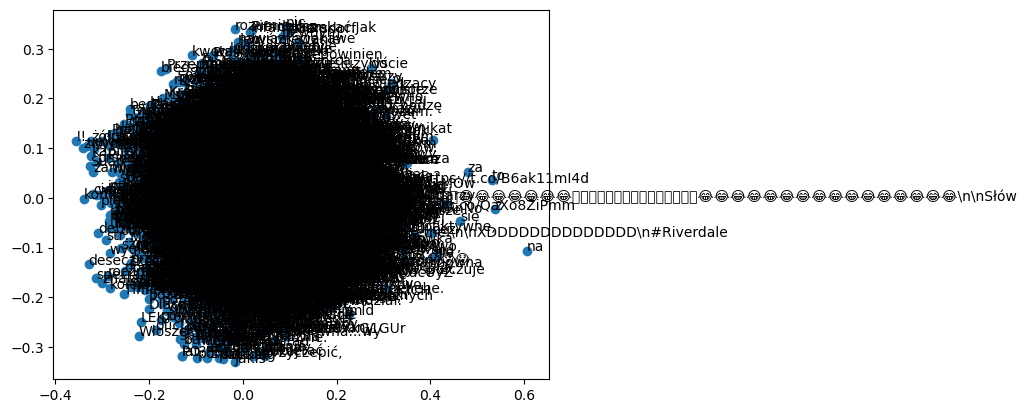

In [9]:
X = model.wv.vectors
pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

# for i, word in enumerate(words):
#    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.scatter(word)

plt.show()

### TODO

- Wiele wyrazów przy tokenizacji ma kropki i przecinki
- Dwie dobre strony z jakimś wstępem do w2v
https://builtin.com/machine-learning/nlp-word2vec-python
https://radimrehurek.com/gensim/models/word2vec.html
-